## BITCOIN Data Analysis

#### What is time series?
- Time series analysis is a statistical technique that deals with time series data, or trend analysis.
- A time series is a sequence where a metric is recorded over regular time intervals.
- Time series data should be treated differently to other types of data
- Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annua
- Most time series data can be described by three components. 
    - Trend → a general systematic linear or (most often) nonlinear component that changes over time and does not repeat
    - Seasonality → a general systematic linear or (most often) nonlinear component that changes over time and does repeat
    - Noise → a non-systematic component that is nor Trend/Seasonality within the data
#### What is Bitcoin?
- Botcoin runs on the concept of Blockchain
- Bitcoin is a particularly volatile market with some unique challenges
- Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. 
- Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary




I have create this notebook to explore the time series data and its various modelling technique. Being not a financial expert, this notebook is not meant to provide any financial advice to anyone

In [91]:
# importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from itertools import product
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import numpy as np
from pandas import datetime as dt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.api import tsa
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

In [15]:
# getting the list of excel file stored on the yahoo datset
# the dates considered are from 1st Jan 2017 to 1st Jan 2019

bitcoin_dataset = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2017, 1, 1), end=datetime.datetime(2019, 1, 1))

In [44]:
bitcoin_dataset.head(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1001.609985,956.099976,963.380005,995.440002,40570922,995.440002
2017-01-02,1031.680054,990.200012,995.440002,1017.049988,66038073,1017.049988
2017-01-03,1035.469971,1006.530029,1017.049988,1033.300049,56085870,1033.300049
2017-01-04,1148.540039,1022.320007,1033.300049,1135.410034,170584623,1135.410034
2017-01-05,1150.630005,874.530029,1135.410034,989.349976,244839289,989.349976
2017-01-06,1027.420044,852.549988,989.349976,886.159973,179160668,886.159973
2017-01-07,900.859985,806.659973,886.159973,888.869995,113037531,888.869995


We have six columns in the dataset.
- High      : The highest price of the bitcoin for a day
- Low       : The lowest price of the bitcoin fot the day
- Open      : The opening price of the bitcoin for the day
- Close     : The closing price price of the bitcoin for the day
- Volume    : The Amount of botcoins traded for the day
- Adj Close : Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions. It is considered to be the true price of that stock

In [41]:
# sinnce by definiton the Adj close price is said to be the true price by the experts, 
# we will use it to reflect the price of the bitcoin for the day

bitcoin_dataset_adj_close = bitcoin_dataset['Adj Close']

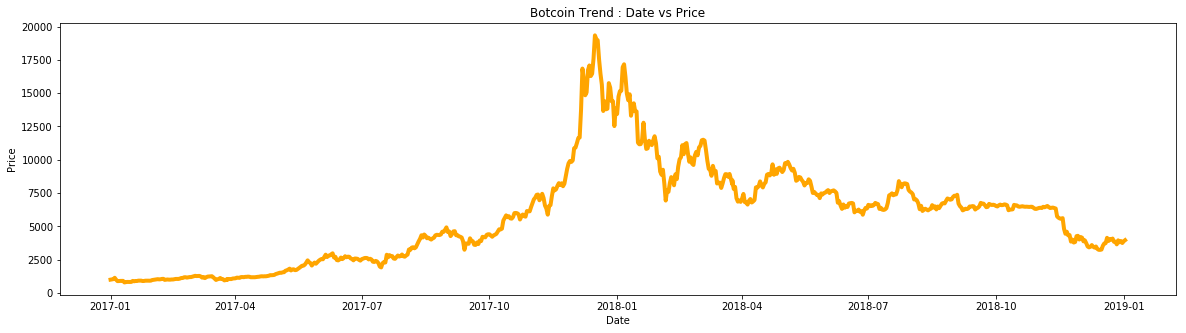

In [35]:
# Visualizing the data
plt.figure(figsize=(20,5))
plt.title('Botcoin Trend : Date vs Price')
plt.plot(bitcoin_dataset.index,bitcoin_dataset['Adj Close'], color = 'orange',linewidth = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

- The data is showing the upward trend till the end of 2017 and then dips down as it goes further to Jan 2019

# Resampling

- Resampling in the time series dataset is a technique for feature engineering
- It can be used to provide additional structure or insight into the learning problem for supervised learning models
- We will be doing the <b> dowsampling technique </b> here, where we decrease the frequency of intervals


In [46]:
# visualizing the resampled data

In [42]:
weekly_average_price = bitcoin_dataset_adj_close.resample('W').mean()
monthly_average_price = bitcoin_dataset_adj_close.resample('M').mean()

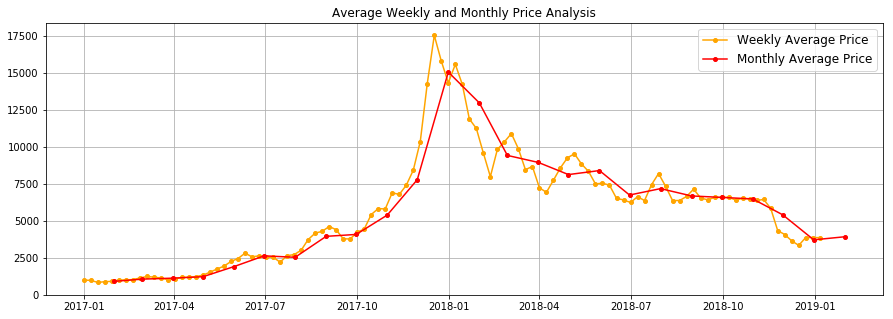

In [60]:
plt.figure(figsize=(15,5))
plt.title('Average Weekly and Monthly Price Analysis')
plt.plot(weekly_average_price, "-o", markersize=4, color='orange', label = 'Weekly Average Price')
plt.plot(monthly_average_price, "-o", markersize=4, color='red', label = 'Monthly Average Price')
plt.legend(loc='upper right', fontsize=12)
plt.grid()
plt.show()

# Check Stationarity of a Time Series?
- A common assumption in many time series techniques is that the data are stationary.
- A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.
- Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).
- When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective

### Moving Average / Rolling Mean or Smoothing Techniques
- A moving average is a technique that calculates the overall trend in a data set
- Moving average is used to smooth out short-term fluctuations and highlight longer-term trends or cycles
- The moving average of a period (extent) m is a series of successive averages of m terms at a time


In [135]:
mov_avg_3 = bitcoin_dataset_adj_close.rolling(window = 3).mean()
mov_std_3 = bitcoin_dataset_adj_close.rolling(window = 3).std()
mov_avg_7 = bitcoin_dataset_adj_close.rolling(window = 7).mean()
mov_std_7 = bitcoin_dataset_adj_close.rolling(window = 7).std()
mov_avg_10 = bitcoin_dataset_adj_close.rolling(window = 10).mean()
mov_std_10 = bitcoin_dataset_adj_close.rolling(window = 10).std()
mov_avg_14 = bitcoin_dataset_adj_close.rolling(window = 14).mean()
mov_std_14 = bitcoin_dataset_adj_close.rolling(window = 14).std()

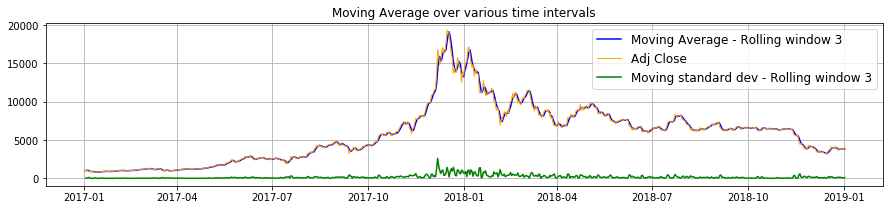

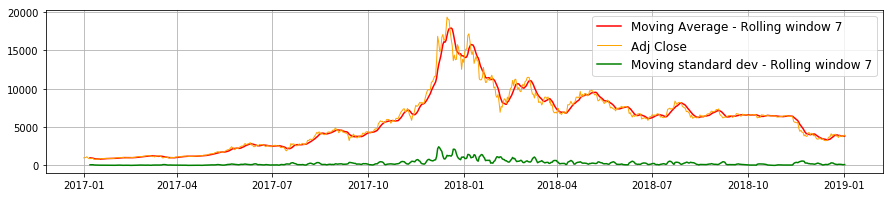

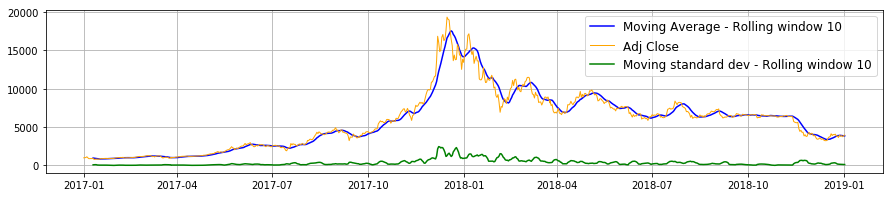

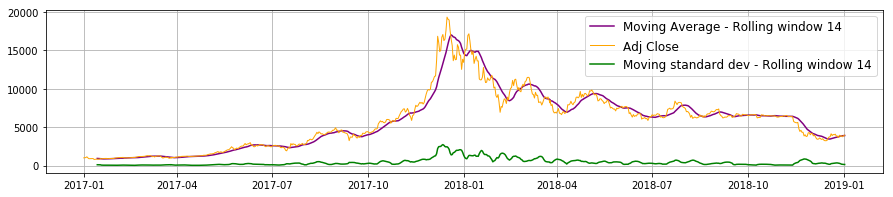

In [136]:
plt.figure(figsize=(15,3))
plt.title('Moving Average over various time intervals')

plt.plot(mov_avg_3, markersize=1, color='blue', label = 'Moving Average - Rolling window 3')
plt.plot(bitcoin_dataset.index,bitcoin_dataset['Adj Close'], color = 'orange',linewidth = 1)
plt.plot(mov_std_3, markersize=1, color='green', label = 'Moving standard dev - Rolling window 3')
plt.legend(loc='upper right', fontsize = 12)
plt.grid()
plt.show()

plt.figure(figsize=(15,3))
plt.plot(mov_avg_7, markersize=1, color='red', label = 'Moving Average - Rolling window 7')
plt.plot(bitcoin_dataset.index,bitcoin_dataset['Adj Close'], color = 'orange',linewidth = 1)
plt.plot(mov_std_7, markersize=1, color='green', label = 'Moving standard dev - Rolling window 7')
plt.legend(loc='upper right', fontsize = 12)
plt.grid()
plt.show()

plt.figure(figsize=(15,3))
plt.plot(mov_avg_10, markersize=1, color='blue', label = 'Moving Average - Rolling window 10')
plt.plot(bitcoin_dataset.index,bitcoin_dataset['Adj Close'], color = 'orange',linewidth = 1)
plt.plot(mov_std_10, markersize=1, color='green', label = 'Moving standard dev - Rolling window 10')
plt.legend(loc='upper right', fontsize = 12)
plt.grid()
plt.show()

plt.figure(figsize=(15,3))
plt.plot(mov_avg_14, markersize=1, color='purple', label = 'Moving Average - Rolling window 14')
plt.plot(bitcoin_dataset.index,bitcoin_dataset['Adj Close'], color = 'orange',linewidth = 1)
plt.plot(mov_std_14, markersize=1, color='green', label = 'Moving standard dev - Rolling window 14')
plt.legend(loc='upper right', fontsize = 12)
plt.grid()
plt.show()

- As seen in the above graphs, as the rolling window increased the graph becomes more and more smoother
- Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series.

#### Drawbaks of Moving average
- This method cannot be used for forecasting future trend
- This method assumes that the trend is linear but it is not always the case

#### Augmented Dickey-Fuller test (ADF)

- This is one of the statistical tests for checking stationarity.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


In [96]:
test_result = adfuller(bitcoin_dataset_adj_close)
print('p - value : ' ,test_result[1])

p - value :  0.2772327597746023


- Since the p-value is > 0.05, we fail to reject the null hypothesis and the data is non-stationary

# Making non-stationary to stationary Time Series

There are 2 major reasons behind non-stationaruty of a Time Series:
- A trend (upward or downwards movement of the curve on the long term) <br>
For example: In this case we saw that on average, the number of botcoin purchased/sold was growing and decreasing over time
- A seasonal component (variations at specific time-frames)<br>
For example: People might have a tendency to buy bitcoins in a particular month because of pay increment or festivals.<bt>
    <br>

So we should:

- <b>Estimate the trend and seasonality in the series and remove those from the series to get a stationary series </b>
- <b>Use statistical forecasting techniques </b>
- <b>convert the forecasted values into the original scale by applying trend and seasonality constraints back</b>

### Differencing

- One of the most common methods of dealing with both trend and seasonality is differencing
- In this technique, we take the difference of the observation at a particular instant with that at the previous instant.

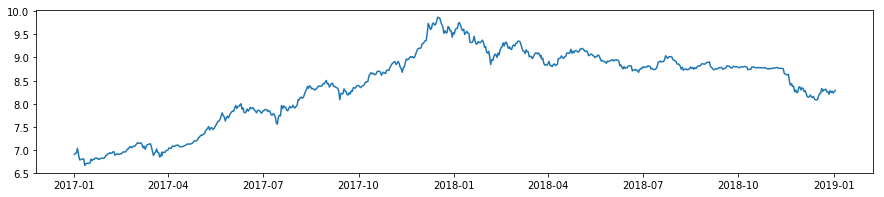

In [156]:
bitcoin_dataset_adj_close_log = np.log(bitcoin_dataset_adj_close) # log tranforamtion
plt.figure(figsize=(15,3))
plt.plot(bitcoin_dataset_adj_close_log)

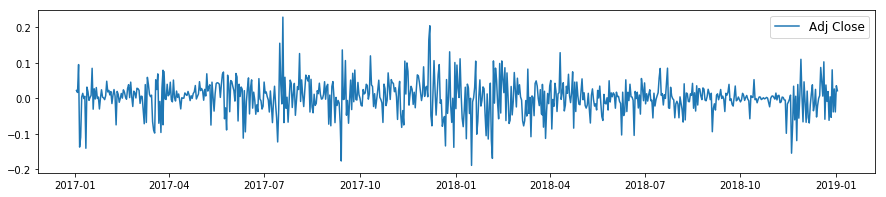

p - value :  3.97402575337124e-21


In [160]:
bitcoin_dataset_adj_close_log_diff = bitcoin_dataset_adj_close_log - bitcoin_dataset_adj_close_log.shift()
plt.figure(figsize=(15,3))
plt.plot(bitcoin_dataset_adj_close_log_diff)
plt.legend(loc='upper right', fontsize = 12)
plt.show()

bitcoin_dataset_adj_close_log_diff.dropna(inplace=True)

test_result = adfuller(bitcoin_dataset_adj_close_log_diff)
print('p - value : ' ,test_result[1])

### Decomposing
- Both trend and seasonality are modeled separately and the remaining part of the series is returned.

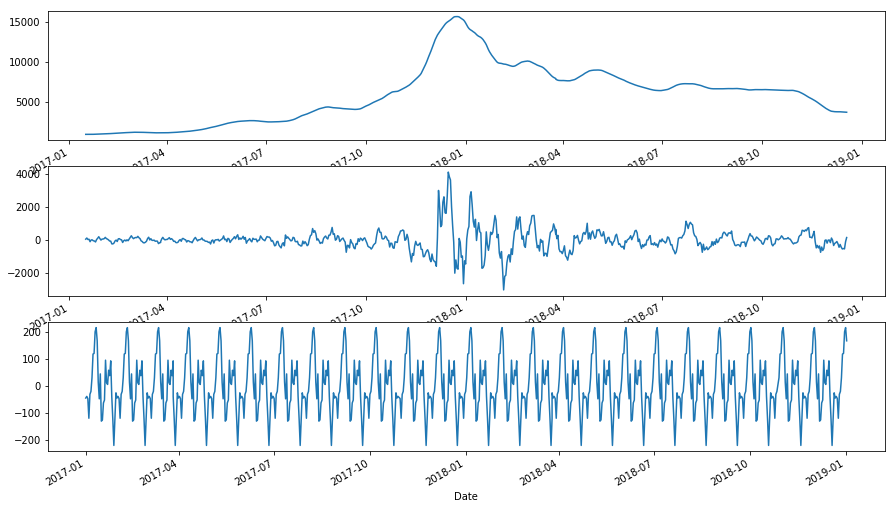

In [131]:
res = sm.tsa.seasonal_decompose(bitcoin_dataset_adj_close, freq = 30)# frequency is taken as 30 because we have the data for each day
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,9))
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)

- At each day the value of your time series (Original) is the sum of its trend, its seasonal component and (by definition) the residuals
- In this approach we see that the trend, seasonality are separated out from data and we can model the residuals. Checking stationarity of residuals

In [154]:
res.resid.dropna(inplace=True)
test_result = adfuller(res.resid)
print('p - value : ' ,test_result[1])

p - value :  1.0860404068179881e-08


##### Now that we know what optimal lag to use to make a relatively stationary version of our original time series we can move on to next step which is training and fitting the models.

# Modelling
There are lot of different methods that we can use when we want perform forecasting. I will mention the methods that I have found during my research.

- Standard / Exponentially Moving Average → calculation to analyze data points by creating series of averages of different subsets of the full data set

- Auto Regression → is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc

- Linear/Polynomial Regression → regression analysis in which the relationship between the independent variable x and the dependent variable yis modelled as an nth degree polynomial (or 1 degree for linear)

- ARMA → model that provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average.

- ARIMA (Autoregressive integrated moving average) → is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting)

- Seasonal ARIMA → seasonal AR and MA terms predict xt using data values and errors at times with lags that are multiples of S (the span of the seasonality)

- ARIMAX → An ARIMA model with covariate on the right hand side
Recurrent Neural Network (LSTM) → a class of artificial neural networkwhere connections between nodes form a directed graph along a sequence in which allows it to exhibit dynamic temporal behavior for a time sequence.

### ARIMA Model
- ARIMA stands for Auto-Regressive Integrated Moving Averages
- The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation

##### The predictors depend on the parameters (p,d,q) of the ARIMA model
- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)


- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value


- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results

##### Determining the value of p, q
- Autocorrelation Function (ACF)
- Partial Autocorrelation Function (PACF)

In [162]:
# bitcoin_dataset_adj_close_log_diff : This is the stationary data